<a href="https://colab.research.google.com/github/FANTASY000666/Simple-regression-model-practice/blob/main/Practising_with_simple_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

Functions that build and train a model


In [ ]:
# 1. Function that builds a Model
def build_model(my_learning_rate):
  """ Create and compile a simple linear regression model """
  # Most tf.keras models are sequential
  # A sequential model contains one or more layers
  model = tf.keras.models.Sequential()

  # Desribe a topography of the model
  # The topography of a simple linear regression model
  # Is a single node in a single layer
  model.add(tf.keras.layers.Dense(units = 1, input_shape=(1,)))

  #compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # Training to minimize the Model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, feature, label, epochs, batch_size):
  """ Train the model by feeding it data """
  # feed the feature value and the label value to the model
  # The model will train for the specified number of epochs
  # gradually learning how the feature values relate to the label values.

  # The fit method returns a History object, which contains information about the training process.
  # This includes metrics such as the loss and any specified evaluation metrics
  # on both the training and validation sets for each epoch.
  # The history object can be used to analyze the training process,
  # plot training curves,
  # and assess model performance.
  # Plot training loss and accuracy
  history = model.fit(x=feature,
                      y=label,
                      batch_size = batch_size,
                      epochs = epochs)


  # Gather the trained model's weight and bias.
  # extracting the trained weights and biases from the model after training.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  # Examining the weights and biases can help in debugging the model. If the model is not learning as expected,
  # inspecting the weights might reveal whether certain features are being assigned higher or lower importance.

  # The list of epochs is stored separately from the
  # rest of history.
  # this can be of importance when tracking the model training
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  # loss and accuracy generated in history are stored in a dataframe hist
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  # acquiring the mean loss from hist
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")







Defined build_model and train_model


Define plotting functions
We're using a popular Python library called Matplotlib to create the following two plots:

1. a plot of the feature values vs. the label values, and a line showing the output of the trained model.
2. a loss curve.

In [ ]:
# @ title defining the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """ plot the trained model against the trained feature and label. """

  # label the axes
  plt.xlabel("feature")
  plt.ylabel("label")

  # plot the feature value vs the plot value
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1)
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1] # the last feature in the set of the array
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r') # Matplotlib function to plot a simple red line graph from (x0, y0) to (x1, y1)

  # display the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """ plot the loss curve which shows the loss Vs epoch. """

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend() # adding a legend t current axes
  plt.ylim([rmse.min()*0.97, rmse.max()]) # sets the y-axis limits of the current axes.
                                          # Ensures the y axis range covers the entire range of your data.
                                          # You can also chose to set the limits of the x-axis
  plt.show()

print("Defined plot_the_model and plot_the_loss_curve functions")


Defined plot_the_model and plot_the_loss_curve functions


Define the Datasets
The datasets contains of 12 examples. Each example containing one feature and one label.

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Specyfing the hyperparameters (Learning rate, epochs, batch_size)

Epoch 1/100
12/12 [==============================] - 0s 3ms/step - loss: 92.6790 - root_mean_squared_error: 9.6270
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 31.7940 - root_mean_squared_error: 5.6386
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 8.8487 - root_mean_squared_error: 2.9747
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 2.0358 - root_mean_squared_error: 1.4268
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0212 - root_mean_squared_error: 1.0106
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0749 - root_mean_squared_error: 1.0368
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1961 - root_mean_squared_error: 1.0937
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0358 - root_mean_squared_error: 1.0178
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 1.1566 - root

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


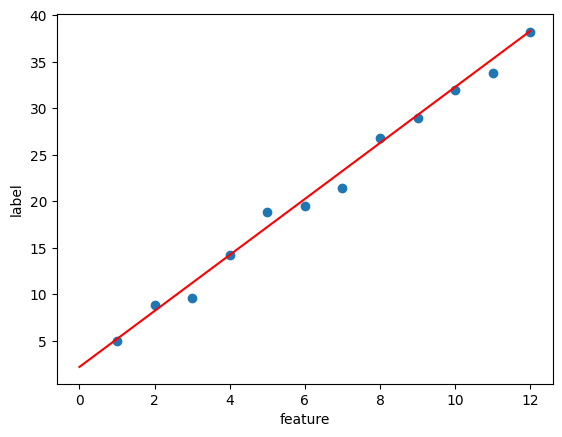

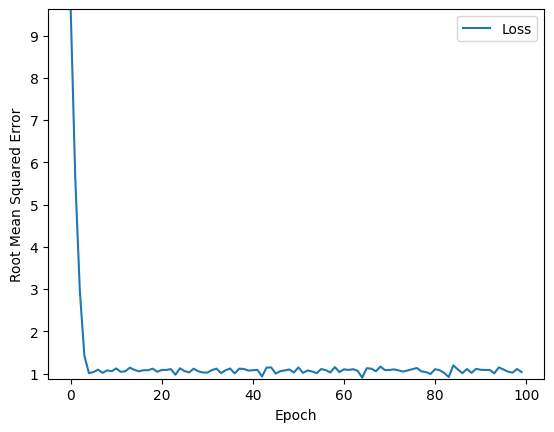

In [ ]:
# @title The following code initializes these parameters and invokes the functions that build and train the model
#  An oscillating loss curve strongly suggests that the learning rate is too high.
# We adjust the learning rate and number of epochs to make training converge as efficiently as possible.
# when to stop adusting the hyperparameters of a model during training :-
# when the model starts to perfom as expected
# When the loss curve starts to adjust to number of blue dots

learning_rate = 0.05 # replace with a floating-point value
epochs = 100         # replace with an integer
my_batch_size = 1

# invoking the function that builds the model
my_model = build_model(learning_rate)

# calling a function train_model
# with various arguments and
# capturing the returned values into variables.
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

# invoking the plot_the_model function to plot the model
# with parameter shown below
plot_the_model(trained_weight, trained_bias, my_feature, my_label)

# invoking the plot_the_loss_curve method
# with parameters epochs and rmse
plot_the_loss_curve(epochs, rmse)